# Loan Applications Predictions(ANN)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Importing Datasets

In [3]:
credit_data = pd.read_csv("credit_features_subset.csv")
loan_data = pd.read_csv("loan_applications.csv")

In [4]:
credit_data.head()

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts
0,216009,227,12,14,11,0,3,0,3,71.36,9292,9292,-1,7
1,217537,49,10,7,6,1,3,1,1,29.33,4592,4592,-1,7
2,221803,134,0,12,11,0,3,5,1,32.33,2737,2737,-1,7
3,222260,227,2,39,12,0,2,2,27,41.56,9229,9229,-1,7
4,222848,132,2,99,11,8,0,9,88,43.34,15443,15443,-1,0


In [5]:
loan_data.head()

,UID,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
0,4921736,03/07/2020,2000,60,Employed - full time,Unexpected bills,0
1,1241981,04/02/2020,3000,60,Employed - full time,Starting new bussniess,0
2,5751748,02/08/2020,20000,60,Employed - full time,Business capital,0
3,7163425,23/09/2020,20000,60,Self employed,New business venture,0
4,227377,01/01/2020,5000,36,Employed - full time,car,0


## Merging Datasets on UID

In [6]:
dataset = pd.merge(credit_data, loan_data, on="UID")
dataset.head()

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success
0,216009,227,12,14,11,0,3,0,3,71.36,9292,9292,-1,7,01/01/2020,7000,36,Employed - full time,purchase,0
1,217537,49,10,7,6,1,3,1,1,29.33,4592,4592,-1,7,01/01/2020,1000,60,Employed - full time,cosmetic surgery,0
2,221803,134,0,12,11,0,3,5,1,32.33,2737,2737,-1,7,01/01/2020,2000,24,Employed - part time,Consolidation,0
3,222260,227,2,39,12,0,2,2,27,41.56,9229,9229,-1,7,01/01/2020,4000,48,Employed - full time,Child expenses,0
4,222848,132,2,99,11,8,0,9,88,43.34,15443,15443,-1,0,01/01/2020,7000,60,Employed - full time,New machine,0


## Preprocessing

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ALL_AgeOfOldestAccount                8847 non-null   int64  
 2   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 3   ALL_Count                             8847 non-null   int64  
 4   ALL_CountActive                       8847 non-null   int64  
 5   ALL_CountClosedLast12Months           8847 non-null   int64  
 6   ALL_CountDefaultAccounts              8847 non-null   int64  
 7   ALL_CountOpenedLast12Months           8847 non-null   int64  
 8   ALL_CountSettled                      8847 non-null   int64  
 9   ALL_MeanAccountAge                    8847 non-null   float64
 10  ALL_SumCurrentOutstandingBal          8847 non-null   int64  
 11  ALL_SumCurrentOut

In [8]:
unique_employment_types = dataset["EmploymentType"].unique()
print("Unique Employment Types:")
print(unique_employment_types)

nb_unique_loan_purposes = dataset["LoanPurpose"].value_counts()
print("\nUnique Loan Purposes:")
print(nb_unique_loan_purposes)

Unique Employment Types:
['Employed - full time' 'Employed - part time' 'Retired' 'Self employed']

Unique Loan Purposes:
LoanPurpose
Car                                                                                                                              978
Consolidation                                                                                                                    581
car                                                                                                                              373
Debt consolidation                                                                                                               357
Other                                                                                                                            310
Home improvement                                                                                                                 224
Home improvements                                                   

In [9]:
dataset['LoanPurpose'] = dataset['LoanPurpose'].str.lower().str.strip()

threshold = 10
value_counts = dataset['LoanPurpose'].value_counts()
rare_categories = value_counts[value_counts < threshold].index
dataset['LoanPurpose'] = dataset['LoanPurpose'].replace(rare_categories, 'rare_categories')
dataset['LoanPurpose'].value_counts()


,count
LoanPurpose,
rare_categories,2824
car,1372
consolidation,721
debt consolidation,602
home improvements,391
other,371
home improvement,349
new car,149
furniture,117


### Grouped Similar or Synonymous Categories

In [10]:
merge_dict = {
    # Group "car"-related purposes
    'car purchase': 'car',
    'car loan': 'car',
    'car repair': 'car',
    'car repairs': 'car',
    'car bills': 'car',
    'vehicle': 'car',
    'new car': 'car',
    'caravan': 'car',
    'motorbike': 'car',
    'motorcycle': 'car',
    'van': 'car',
    'a car': 'car',
    'buy a car': 'car',
    'used car': 'car',

    # Group "debt"-related purposes
    'consolidation': 'debt consolidation',
    'debts': 'debt consolidation',
    'debt': 'debt consolidation',
    'consolidate debt': 'debt consolidation',
    'consolidate debts': 'debt consolidation',
    'consolidating debts': 'debt consolidation',
    'consolidating': 'debt consolidation',
    'consolodation': 'debt consolidation',
    'consolidation of debts': 'debt consolidation',
    'credit card': 'debt consolidation',
    'credit cards': 'debt consolidation',
    'pay off credit cards': 'debt consolidation',
    'pay off credit card': 'debt consolidation',
    'credit card consolidation': 'debt consolidation',
    'credit card bills': 'debt consolidation',

    # Group "home improvements"-related purposes
    'home improvement': 'home improvements',
    'home improvments': 'home improvements',
    'house improvements': 'home improvements',
    'household': 'home improvements',
    'household items': 'home improvements',
    'house': 'home improvements',
    'household goods': 'home improvements',
    'house hold goods': 'home improvements',
    'house repairs': 'home improvements',
    'house hold': 'home improvements',
    'diy': 'home improvements',
    'tools': 'home improvements',

    # Group "emergency"-related purposes
    'emergency': 'emergency',
    'unexpected expense': 'emergency',
    'short term cash': 'emergency',
    'family emergency': 'emergency',

    # Group "vet"-related purposes
    'vet bills': 'vet bills',
    'vet bill': 'vet bills',
    'vets bills': 'vet bills',
    'vet\'s bills': 'vet bills',

    # Group "wedding"-related purposes
    'wedding': 'wedding',
    'engagement ring': 'wedding',

    # Group "holiday"-related purposes
    'holiday': 'holiday',
    'vacation': 'holiday',
    'travel': 'holiday',
    'moving house': 'holiday',
    'consolidation and holiday': 'holiday',

    # Group other categories
    'repairs': 'other',
    'bike': 'other',
    'furniture': 'other',
    'rent': 'other',
    'personal loan': 'other',
    'medical': 'other',
    'medical bill': 'other',
    'baby': 'other',
    'shopping': 'other',
    'white goods': 'other',
    'investment': 'other',
    'purchase': 'other',
    'improvements': 'other',
    'boiler': 'other',
    'short term loan': 'other',
}


In [11]:
dataset['LoanPurpose'] = dataset['LoanPurpose'].replace(merge_dict)

# Combine rare categories again (if needed)
threshold = 20
value_counts = dataset['LoanPurpose'].value_counts()
rare_categories = value_counts[value_counts < threshold].index
dataset['LoanPurpose'] = dataset['LoanPurpose'].replace(rare_categories, 'rare_categories')
dataset['LoanPurpose'].value_counts()


,count
LoanPurpose,
rare_categories,2930
car,1960
debt consolidation,1691
home improvements,1014
other,795
vet bills,141
emergency,114
holiday,85
wedding,66


### One Hot Encoder


In [12]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
columns_to_encode = dataset[["EmploymentType", "LoanPurpose"]]
encoded_columns = encoder.fit_transform(columns_to_encode)
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['EmploymentType', 'LoanPurpose']))

In [13]:
print("Encoded Data")
print(encoded_df.head())

Encoded Data
   EmploymentType_Employed - full time  EmploymentType_Employed - part time  \
0                                  1.0                                  0.0   
1                                  1.0                                  0.0   
2                                  0.0                                  1.0   
3                                  1.0                                  0.0   
4                                  1.0                                  0.0   

   EmploymentType_Retired  EmploymentType_Self employed  LoanPurpose_car  \
0                     0.0                           0.0              0.0   
1                     0.0                           0.0              0.0   
2                     0.0                           0.0              0.0   
3                     0.0                           0.0              0.0   
4                     0.0                           0.0              0.0   

   LoanPurpose_debt consolidation  LoanPurpose_emergenc

### Concat Dataset with Encoded

In [14]:
new_dataset = pd.concat([dataset, encoded_df], axis=1)
new_dataset.head()

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts,ApplicationDate,Amount,Term,EmploymentType,LoanPurpose,Success,EmploymentType_Employed - full time,EmploymentType_Employed - part time,EmploymentType_Retired,EmploymentType_Self employed,LoanPurpose_car,LoanPurpose_debt consolidation,LoanPurpose_emergency,LoanPurpose_holiday,LoanPurpose_home,LoanPurpose_home improvements,LoanPurpose_other,LoanPurpose_rare_categories,LoanPurpose_vet bills,LoanPurpose_wedding
0,216009,227,12,14,11,0,3,0,3,71.36,9292,9292,-1,7,01/01/2020,7000,36,Employed - full time,other,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217537,49,10,7,6,1,3,1,1,29.33,4592,4592,-1,7,01/01/2020,1000,60,Employed - full time,rare_categories,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,221803,134,0,12,11,0,3,5,1,32.33,2737,2737,-1,7,01/01/2020,2000,24,Employed - part time,debt consolidation,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,222260,227,2,39,12,0,2,2,27,41.56,9229,9229,-1,7,01/01/2020,4000,48,Employed - full time,rare_categories,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,222848,132,2,99,11,8,0,9,88,43.34,15443,15443,-1,0,01/01/2020,7000,60,Employed - full time,rare_categories,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
new_dataset.drop(columns=["EmploymentType", "LoanPurpose"], inplace=True)
new_dataset.head()

,UID,ALL_AgeOfOldestAccount,ALL_AgeOfYoungestAccount,ALL_Count,ALL_CountActive,ALL_CountClosedLast12Months,ALL_CountDefaultAccounts,ALL_CountOpenedLast12Months,ALL_CountSettled,ALL_MeanAccountAge,ALL_SumCurrentOutstandingBal,ALL_SumCurrentOutstandingBalExcMtg,ALL_TimeSinceMostRecentDefault,ALL_WorstPaymentStatusActiveAccounts,ApplicationDate,Amount,Term,Success,EmploymentType_Employed - full time,EmploymentType_Employed - part time,EmploymentType_Retired,EmploymentType_Self employed,LoanPurpose_car,LoanPurpose_debt consolidation,LoanPurpose_emergency,LoanPurpose_holiday,LoanPurpose_home,LoanPurpose_home improvements,LoanPurpose_other,LoanPurpose_rare_categories,LoanPurpose_vet bills,LoanPurpose_wedding
0,216009,227,12,14,11,0,3,0,3,71.36,9292,9292,-1,7,01/01/2020,7000,36,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217537,49,10,7,6,1,3,1,1,29.33,4592,4592,-1,7,01/01/2020,1000,60,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,221803,134,0,12,11,0,3,5,1,32.33,2737,2737,-1,7,01/01/2020,2000,24,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,222260,227,2,39,12,0,2,2,27,41.56,9229,9229,-1,7,01/01/2020,4000,48,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,222848,132,2,99,11,8,0,9,88,43.34,15443,15443,-1,0,01/01/2020,7000,60,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   UID                                   8847 non-null   int64  
 1   ALL_AgeOfOldestAccount                8847 non-null   int64  
 2   ALL_AgeOfYoungestAccount              8847 non-null   int64  
 3   ALL_Count                             8847 non-null   int64  
 4   ALL_CountActive                       8847 non-null   int64  
 5   ALL_CountClosedLast12Months           8847 non-null   int64  
 6   ALL_CountDefaultAccounts              8847 non-null   int64  
 7   ALL_CountOpenedLast12Months           8847 non-null   int64  
 8   ALL_CountSettled                      8847 non-null   int64  
 9   ALL_MeanAccountAge                    8847 non-null   float64
 10  ALL_SumCurrentOutstandingBal          8847 non-null   int64  
 11  ALL_SumCurrentOut

## Data Visualization

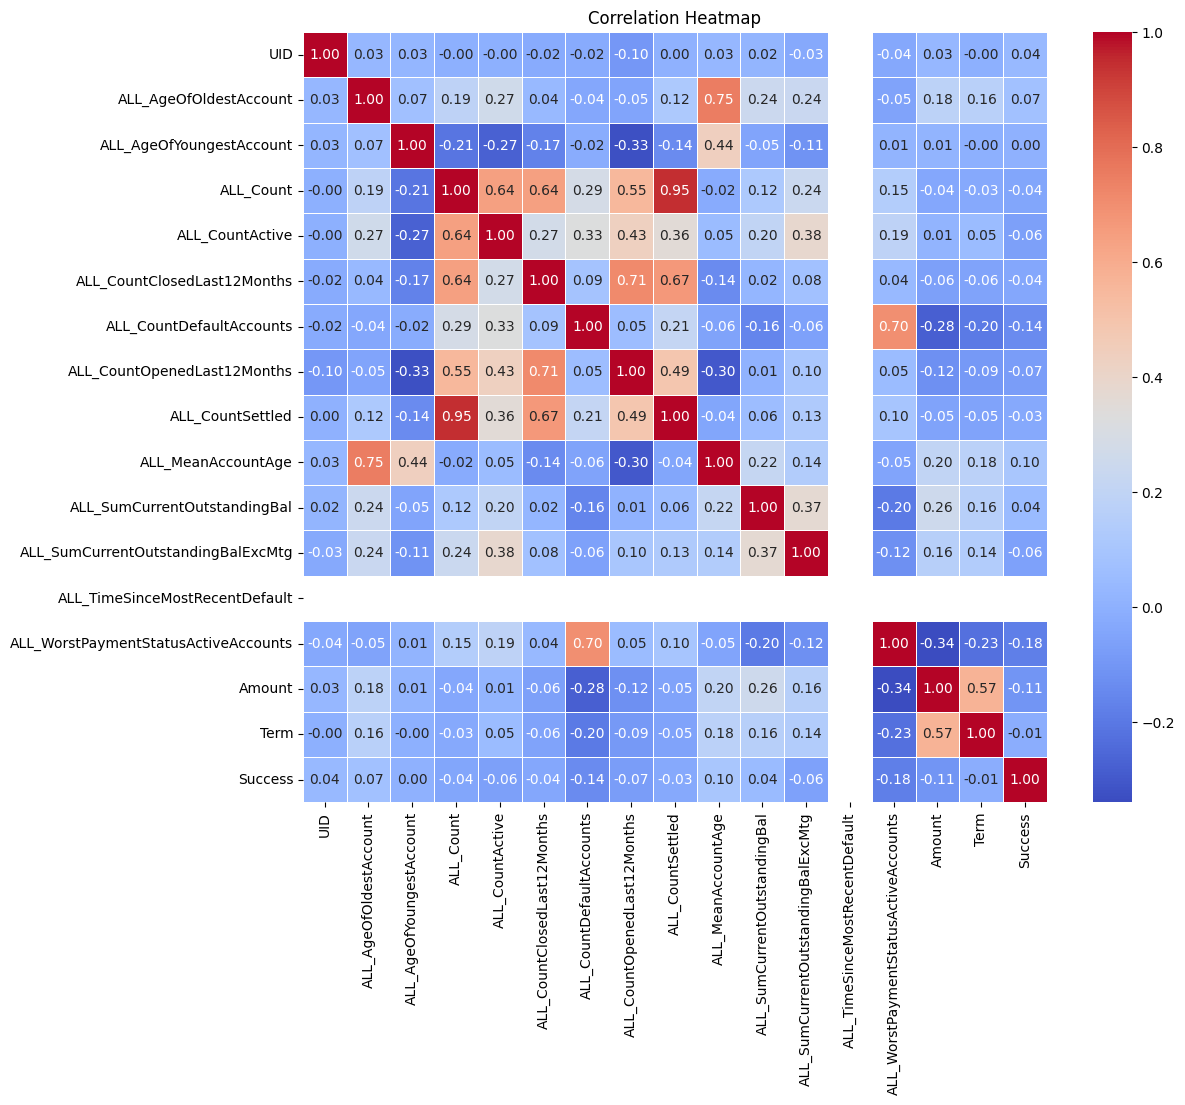

In [17]:
import seaborn as sns
int_columns = dataset.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = int_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

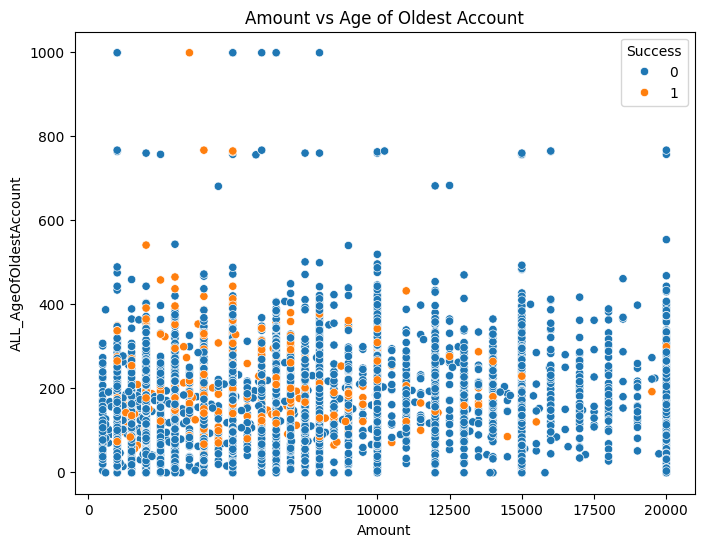

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['Amount'], y=dataset['ALL_AgeOfOldestAccount'], hue=dataset['Success'])
plt.title('Amount vs Age of Oldest Account')
plt.show()


## Splitting the Dataset

In [19]:
from sklearn.model_selection import train_test_split
X = new_dataset.drop(columns=['Success', 'ApplicationDate'])
y = new_dataset['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Building ANN

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

ann1 = Sequential()

### Adding First (Input) Layer

In [22]:
ann1.add(Input(shape=(X_train.shape[1],)))

### Adding Hidden Layers

In [23]:
ann1.add(Dense(units=64, activation="relu"))
ann1.add(Dense(units=32, activation="relu"))

### Adding Output Layer

In [24]:
ann1.add(Dense(units=1, activation="sigmoid"))

### Compile ANN

In [25]:
ann1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
ann1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8543 - loss: 0.3802 - val_accuracy: 0.8910 - val_loss: 0.2817
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8916 - loss: 0.2744 - val_accuracy: 0.8932 - val_loss: 0.2684
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9003 - loss: 0.2600 - val_accuracy: 0.8972 - val_loss: 0.2702
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9030 - loss: 0.2458 - val_accuracy: 0.8944 - val_loss: 0.2640
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9061 - loss: 0.2368 - val_accuracy: 0.8977 - val_loss: 0.2653
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8995 - loss: 0.2458 - val_accuracy: 0.8972 - val_loss: 0.2657
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9102 - loss: 0.2306 - val_accuracy: 0.9023 - val_loss: 0.2625
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9108 - loss: 0.2265 - val_accuracy: 0.

### Making Confussion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = ann1.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[1556   22]
 [ 152   40]]
Accuracy Score: 0.9016949152542373
